In [109]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import pandas as pd

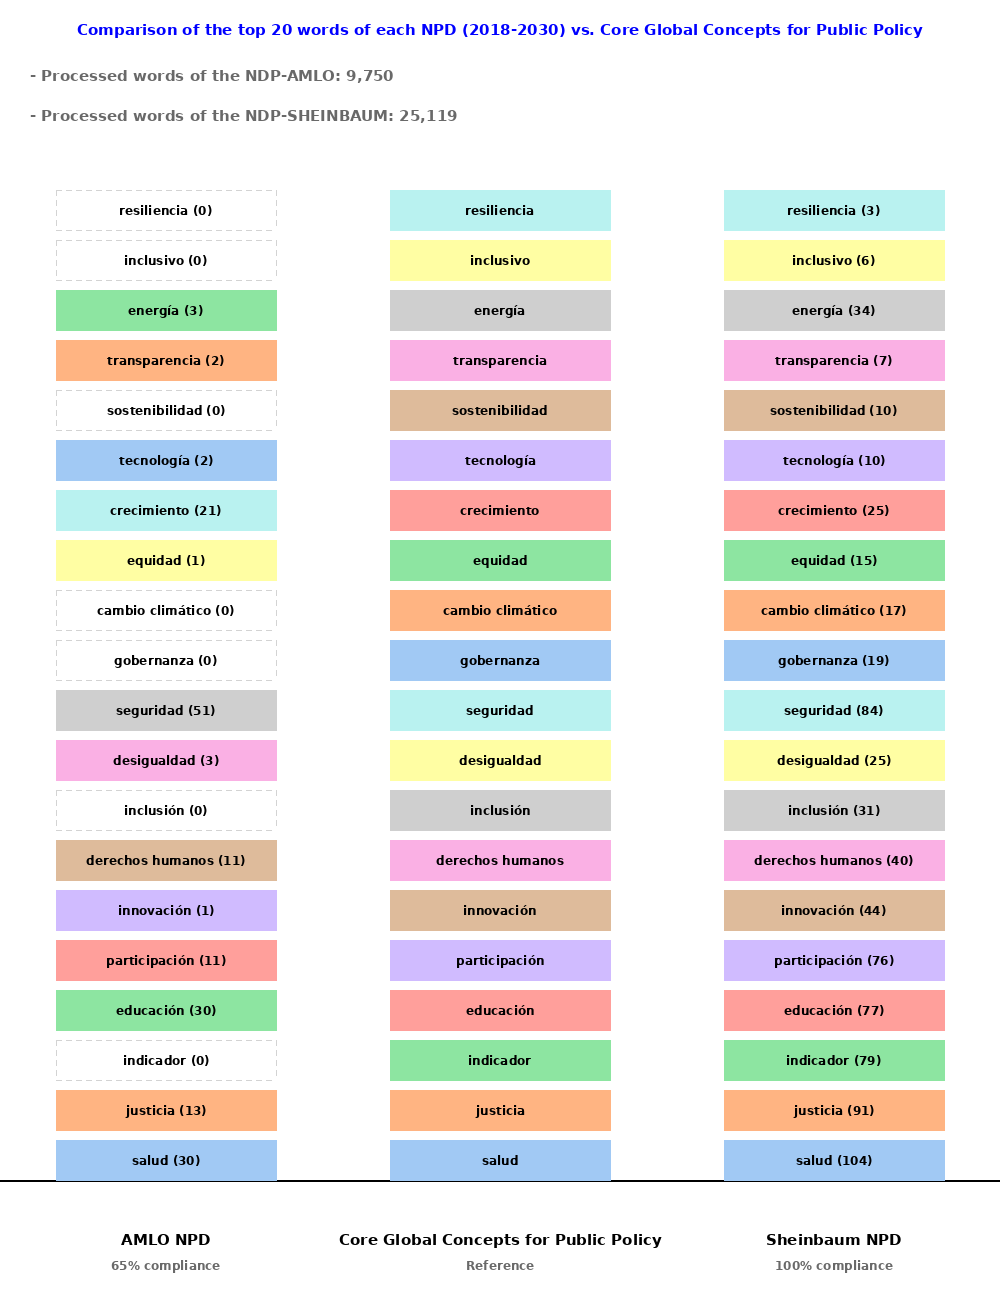

In [124]:
from PIL import Image  # Ensure this import is at the top of the cell


df_keywords = pd.read_csv("results/words_desired.csv")
#convert to lower case
df_keywords["DesiredWords"] = df_keywords["DesiredWords"].str.lower()

df_amlo_desired = pd.read_csv("results/words_desired_AMLO.csv")
df_she_desired = pd.read_csv("results/words_desired_SHE.csv")

#Convert to minus letters
df_she_desired["words_desired_she"] = df_she_desired["words_desired_she"].str.lower()
df_amlo_desired["words_desired_amlo"] = df_amlo_desired["words_desired_amlo"].str.lower()
#Remove numbers of words
df_amlo_desired['words_desired_amlo'] = df_amlo_desired['words_desired_amlo'].str.replace(r'^\d+\.\s*', '', regex=True)
df_she_desired['words_desired_she'] = df_she_desired['words_desired_she'].str.replace(r'^\d+\.\s*', '', regex=True)



# Crear diccionarios de conteo a partir de los DataFrames
keywords = df_keywords['DesiredWords'].tolist()
# Crear diccionarios de conteo a partir de las columnas 'words_desired_amlo' y 'count'
amlo_counts = dict(zip(df_amlo_desired['words_desired_amlo'], df_amlo_desired['count']))

# Crear diccionarios de conteo a partir de las columnas 'words_desired_she' y 'count'
sheinbaum_counts = dict(zip(df_she_desired['words_desired_she'], df_she_desired['count']))


# Extraer el número total de palabras procesadas
total_words_amlo = pd.read_csv("results/total_words_AMLO.csv")
total_words_she = pd.read_csv("results/total_words_SHE.csv")
# Remove commas and convert to integer
icount_words_amlo = int(total_words_amlo['total_words'][0].replace(',', ''))
icount_words_she = int(total_words_she['total_words'][0].replace(',', ''))



# Paleta tipo seaborn pastel
pastel_colors = [
    "#a1c9f4", "#ffb482", "#8de5a1", "#ff9f9b", "#d0bbff", "#debb9b",
    "#fab0e4", "#cfcfcf", "#fffea3", "#b9f2f0"
]

# Parámetros de dibujo
width, height = 1000, 1300
bg_color = "white"
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"



img = Image.new("RGB", (width, height), bg_color)
draw = ImageDraw.Draw(img)
font = ImageFont.truetype(font_path, size=12)
title_font = ImageFont.truetype(font_path, size=15)
title_font_color = "gray"



# Coordenadas base
section_width = width // 3
section_x = [section_width // 2, width // 2, width - section_width // 2]
start_y = height - 120
box_height = 40
padding = 10

# Dibujar eje X
draw.line([(0, start_y), (width, start_y)], fill="black", width=2)

# Función para dibujar palabras apiladas únicas con conteo
def draw_grouped_words(counts_dict, x_center):
    y = start_y
    color_index = 0
    for word in keywords:
        count = counts_dict.get(word, 0)
        
        if count > 0:
            # Si existe, usa color pastel
            box_color = pastel_colors[color_index % len(pastel_colors)]
            color_index += 1
            draw.rectangle(
                [x_center - 110, y - box_height, x_center + 110, y],
                fill=box_color
            )
        else:
            # Si no existe, usa gris claro y línea punteada simulada
            box_color = "#D3D3D3"  # Gris claro
            # Simular línea punteada dibujando bordes con gaps
            rect = [x_center - 110, y - box_height, x_center + 110, y]
            step = 5
            for i in range(rect[0], rect[2], step*2):
                draw.line([(i, rect[1]), (i+step, rect[1])], fill=box_color)
                draw.line([(i, rect[3]), (i+step, rect[3])], fill=box_color)
            for i in range(rect[1], rect[3], step*2):
                draw.line([(rect[0], i), (rect[0], i+step)], fill=box_color)
                draw.line([(rect[2], i), (rect[2], i+step)], fill=box_color)

        label = f"{word} ({count})"
        draw.text(
            (x_center, y - box_height / 2),
            label,
            font=font,
            fill="black",
            anchor="mm"
        )
        y -= box_height + padding

# Función para dibujar palabras clave al centro (sin conteo)
def draw_reference_words(words, x_center):
    y = start_y
    for i, word in enumerate(words):
        box_color = pastel_colors[i % len(pastel_colors)]
        draw.rectangle(
            [x_center - 110, y - box_height, x_center + 110, y],
            fill=box_color
        )
        draw.text(
            (x_center, y - box_height / 2),
            word,
            font=font,
            fill="black",
            anchor="mm"
        )
        y -= box_height + padding

# Dibujar columnas
draw_grouped_words(amlo_counts, section_x[0])
draw_reference_words(keywords, section_x[1])
draw_grouped_words(sheinbaum_counts, section_x[2])

# Etiquetas abajo
draw.text((section_x[0], height - 60), "AMLO NPD", font=title_font, fill="black", anchor="mm")
draw.text((section_x[1], height - 60), "Core Global Concepts for Public Policy", font=title_font, fill="black", anchor="mm")
draw.text((section_x[2], height - 60), "Sheinbaum NPD", font=title_font, fill="black", anchor="mm")

# Dibujar el texto en la parte superior del gráfico alineado a la izquierda
header_text_graph = f"Comparison of the top 20 words of each NPD (2018-2030) vs. Core Global Concepts for Public Policy"
header_text_amlo = f"- Processed words of the NDP-AMLO: {icount_words_amlo:,}"
header_text_she = f"- Processed words of the NDP-SHEINBAUM: {icount_words_she:,}"

#draw.text((30, 30), header_text_graph, font=title_font, fill="blue", anchor="lt")
draw.text((width // 2, 30), header_text_graph, font=title_font, fill="blue", anchor="mm")
draw.text((30, 70), header_text_amlo, font=title_font, fill="dimgray", anchor="lt")
draw.text((30, 110), header_text_she, font=title_font, fill="dimgray", anchor="lt")

# Calcular porcentaje de cumplimiento
total_keywords = len(keywords)
amlo_matched = sum(1 for word in keywords if amlo_counts.get(word, 0) > 0)
she_matched = sum(1 for word in keywords if sheinbaum_counts.get(word, 0) > 0)

amlo_pct = int(round(100 * amlo_matched / total_keywords, 1))
she_pct = int(round(100 * she_matched / total_keywords, 1))

# Dibujar los porcentajes de cumplimiento debajo de las etiquetas
draw.text((section_x[0], height - 35), f"{amlo_pct}% compliance", font=font, fill="dimgray", anchor="mm")
draw.text((section_x[1], height - 35), "Reference", font=font, fill="dimgray", anchor="mm")
draw.text((section_x[2], height - 35), f"{she_pct}% compliance", font=font, fill="dimgray", anchor="mm")
path_img = "results/images/comp_pnds.png"

# save and show the image
img.save(path_img)
#img.show()
#muestra la imagen com_pnds.png dentro del jupyter
from IPython.display import Image
Image(filename=path_img)


##### Intersection of words in NDP ( National Development Plan ) 2018 VS NDP 2025

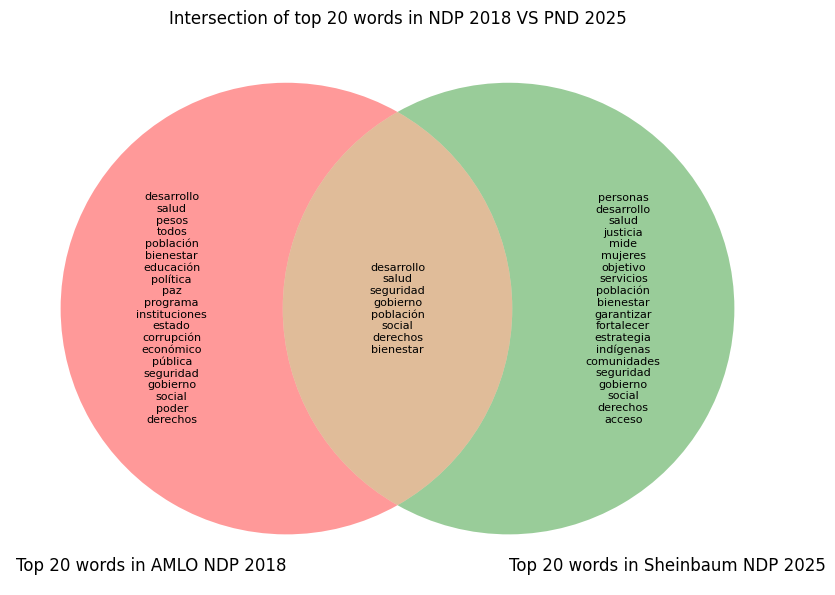

In [126]:

#read files CSV
df_amlo_top = pd.read_csv("results/words_top_AMLO.csv")
df_she_top = pd.read_csv("results/words_top_SHE.csv")
#Convert to minus letters
df_she_top["SheWords"] = df_she_top["SheWords"].str.lower()
df_amlo_top["AMLOWords"] = df_amlo_top["AMLOWords"].str.lower()
#Remove numbers of words
df_amlo_top['AMLOWords'] = df_amlo_top['AMLOWords'].str.replace(r'^\d+\.\s*', '', regex=True)
df_she_top['SheWords'] = df_she_top['SheWords'].str.replace(r'^\d+\.\s*', '', regex=True)

# convert to set
words_amlo = set(df_amlo_top["AMLOWords"])
words_she = set(df_she_top["SheWords"])
# Define  two groups

# Palabras coincidentes y excluyentes
common_words = words_amlo.intersection(words_she)
only_amlo =words_amlo - words_she
only_she = words_she - words_amlo

# adjust the size of the figure
plt.figure(figsize=(10, 8))  # Cambia los valores de width y height según lo necesites


# Crear el diagrama de Venn
venn = venn2([words_amlo, words_she], set_labels=("Top 20 words in AMLO NDP 2018", "Top 20 words in Sheinbaum NDP 2025"))

# Personalizar las etiquetas de los subconjuntos
venn.get_label_by_id('10').set_text('\n'.join(words_amlo))  # Solo en AMLO
venn.get_label_by_id('01').set_text('\n'.join(words_she))   # Solo en Sheinbaum
venn.get_label_by_id('11').set_text('\n'.join(common_words))  # Comunes

venn.get_label_by_id('10').set_fontsize(8)
venn.get_label_by_id('01').set_fontsize(8)
venn.get_label_by_id('11').set_fontsize(8)

# Add title
plt.title("Intersection of top 20 words in NDP 2018 VS PND 2025")
plt.show()
